In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import shuffle



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 預處理

In [ ]:
data = pd.read_csv("/content/drive/My Drive/dataset/SVMdata.csv")
for i in range(10):
    data = shuffle(data)
#拿出資料90%當作訓練集
par = np.random.rand(len(data)) < 0.9
data_train = data[par]
#剩下的當作test集
data_test = data[~par]

train_data = data.values
test_data = data.values
#前4列的資料進行訓練
X_train = train_data[:,0:4]
X_train=X_train.astype(float)
#第5列之後為目標變量
Y_train = train_data[:,4:]
Y_train= Y_train.astype(float)
#前4列為測試集
X_test = test_data[:,0:4]
X_test=X_test.astype(float)
#第5列之後為訓練目標變量
Y_test = test_data[:,4:].flatten() 
Y_test=Y_test.astype(float)
print(data)


             ts  door_state  sphone_signal  label  type
35295 -0.877427           0              0      0     3
50733 -0.877618           0              0      0     3
43767 -0.877422           0              0      0     3
769    1.098494           0              0      1     1
57852 -0.748196           0              0      0     3
...         ...         ...            ...    ...   ...
7986   1.079504           0              0      1     2
2465   1.339487           0              0      1     0
6059   1.096937           0              0      1     1
20548 -0.748369           0              0      0     3
45600 -0.877403           0              0      0     3

[59587 rows x 5 columns]


In [ ]:
data.head(10)

,ts,door_state,sphone_signal,label,type
35295,-0.877427,0,0,0,3
50733,-0.877618,0,0,0,3
43767,-0.877422,0,0,0,3
769,1.098494,0,0,1,1
57852,-0.748196,0,0,0,3
47306,-0.877713,0,0,0,3
25062,1.298251,1,1,1,5
27101,1.175146,0,0,1,4
47311,-0.877712,0,0,0,3
2126,1.338889,0,0,1,0


## Svm RBF建置

In [ ]:
rbfmodel=svm.SVC(kernel='rbf',gamma=0.7,C=1)
rbfmodel.fit(X_train,Y_train)
predicted=rbfmodel.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 測試集的準確度

In [ ]:
accuracy = rbfmodel.score(X_test, Y_test)
print("測試資料集的準確度 = {:.4f}".format(accuracy))

測試資料集的準確度 = 0.9926


## KFold驗證

In [ ]:
accuracy = cross_val_score(rbfmodel, X_test, Y_test, cv=10, scoring="accuracy")
print(accuracy)
print(accuracy.mean()*100,'%')

## 輸出混淆矩陣

In [ ]:
Y_pred = predicted

from sklearn.metrics import multilabel_confusion_matrix

#row=Y_test col=Y_pred
cm=confusion_matrix(Y_test,Y_pred)
print(cm)

[[ 4945     0     0     0     0    55     0     0]
 [    0  4716   284     0     0     0     0     0]
 [    0     0  5000     0     0     0     0     0]
 [    0     0     0 35000     0     0     0     0]
 [    0     0     0     0  5000     0     0     0]
 [    0     0     0     0     0  2902     0     0]
 [    0     0     0     0     0     0   529     0]
 [    0     0     0     0   104     0     0  1052]]


## 繪製熱力圖

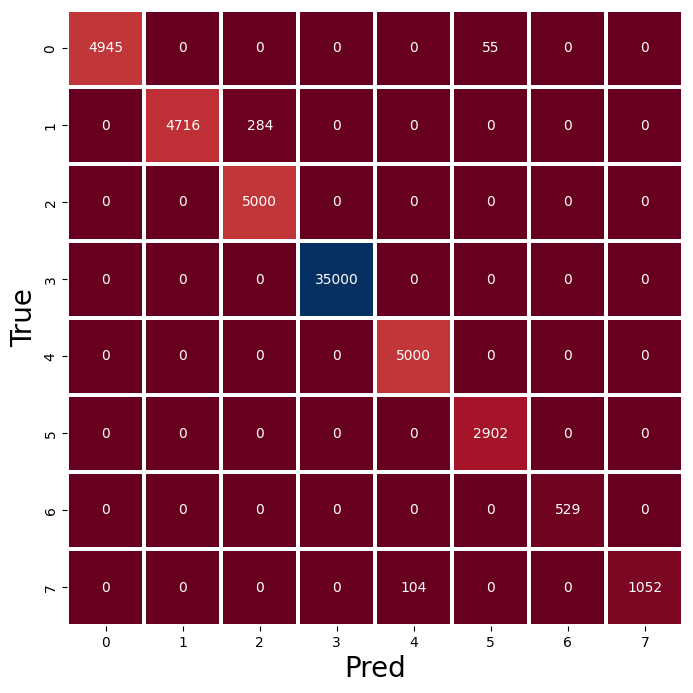

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
plt.xlabel('Pred',fontsize=20)
plt.ylabel('True',fontsize=20)
plt.show()